# The Battle of Neighborhoods - New York & Toronto


## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data Collection](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)
* [References](#references)

## Introduction: Business Problem  <a name="introduction"></a>

The problem statement for this project will be:  
> **_"What types of restaurants are available in New York, USA and Toronto, Canada?"_**

No matter where in the world you travel, food is the most talked about topic. In this project, I would like to focus on whether there is a variety of restaurants available for all travellers in the 2 big cities: New York, USA and Toronto, Canada.

## Data Collection  <a name="data"></a>

In this project, I will be using different sources to extract data.  
For the New York, USA the data provided on **NYU Spatial Data Repository** website will be used. It contains the Boroughs, Neighborhoods and their Latitude and Longitude details. The dataframe contains 5 boroughs and 306 neighborhoods.

For Toronto, Canada the data for Neighborhoods is scraped from **Wikipedia** and their geographical coordinates were provided from a previous module in the **IBM Data Science** course from **Coursera**. The data consists of the postcodes, boroughs, neighborhoods and their latitude and longitude. The dataframe contains 11 Boroughs and 103 Neighborhoods.

The process of web scraping is made simpler with the use of 2 libraries: **Requests** and **Beautiful Soup**. The Requests library allows you to make use of HTTP within your Python programs in a human readable way, and the Beautiful Soup module is designed to get web scraping of HTML and XML pages done quickly.  

## Methodology  <a name="methodology"></a>

The data collected for the 2 big cities contains the locations and their geographic coordinates. 

Based on the open data available on the web, I will focus on the most populated Boroughs in New York and Toronto. Data from **data.gov** website for New York and data from the **National Statistics Office** website for Toronto.

Once I have the location details, I still require data for restaurants. In order to retrieve this information, I am going to use **Foursquare API** to retrieve location based restaurants in the 2 big cities. By using the **Folium map** library in Python, I will be able to visually display the locations.  

And finally, by using **K-Means clustering** algotritm, I will be grouping the data into 5 clusters and analyze where the majority of these restaurants are located.

## Analysis  <a name="analysis"></a>

#### IMPORT LIBRARIES

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
!conda install -c conda-forge geocoder -y
import geocoder # import geocoder
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt; plt.rcdefaults()
import seaborn as sns

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

# Install Beautiful Soup for Web-scraping
!easy_install beautifulsoup4
# Open up a new Terminal and run the following:
#pip install beautifulsoup4

from bs4 import BeautifulSoup
import requests # library to handle requests

print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Searching for beautifulsoup4
Best match: beautifulsoup4 4.8.0
Adding beautifulsoup4 4.8.0 to easy-install.pth file

Using /Users/KT/opt/anaconda3/lib/python3.7/site-packages
Processing dependencies for beautifulsoup4
Finished processing dependencies for beautifulsoup4
Libraries imported.


### NEW YORK DATASET

**NYU Spatial Data Repository** website contains New York data and can be downloaded as a .json file. By using Pandas library in Python, I have converted the .json file contents into a dataframe.

This is the output of the New York Boroughs and Neighborhoods and their Latitude and Longitude.

In [2]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

In [3]:
newyork_data

{'type': 'FeatureCollection',
 'totalFeatures': 306,
 'features': [{'type': 'Feature',
   'id': 'nyu_2451_34572.1',
   'geometry': {'type': 'Point',
    'coordinates': [-73.84720052054902, 40.89470517661]},
   'geometry_name': 'geom',
   'properties': {'name': 'Wakefield',
    'stacked': 1,
    'annoline1': 'Wakefield',
    'annoline2': None,
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.84720052054902,
     40.89470517661,
     -73.84720052054902,
     40.89470517661]}},
  {'type': 'Feature',
   'id': 'nyu_2451_34572.2',
   'geometry': {'type': 'Point',
    'coordinates': [-73.82993910812398, 40.87429419303012]},
   'geometry_name': 'geom',
   'properties': {'name': 'Co-op City',
    'stacked': 2,
    'annoline1': 'Co-op',
    'annoline2': 'City',
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.82993910812398,
     40.87429419303012,
     -73.82993910812398,
     40.87429419303012]}},
  {'type': 'Feature',
 

In [4]:
NY_neighborhoods_data = newyork_data['features']

In [5]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
NY_neighborhoods = pd.DataFrame(columns=column_names)

In [6]:
for data in NY_neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    NY_neighborhoods = NY_neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [7]:
NY_neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [8]:
print('The New York dataframe has {} boroughs and {} neighborhoods.'.format(
        len(NY_neighborhoods['Borough'].unique()),
        NY_neighborhoods.shape[0]
    )
)

The New York dataframe has 5 boroughs and 306 neighborhoods.


### TORONTO DATASET

To obtain Toronto's data, I used **Wikipedia** website which lists all the Postcodes of Toronto and their corresponding Boroughs and Neighborhoods. I scraped the **Wikipedia** webpage which converted the table contents on **Wikipedia** into a dataframe.

In [9]:
website_url = requests.get('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M').text

soup = BeautifulSoup(website_url,'lxml')

We’ll print this out with the prettify() method in order to turn the Beautiful Soup parse tree into a nicely formatted Unicode string.

In [10]:
print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   List of postal codes of Canada: M - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgMonthNamesShort":["","Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"],"wgRequestId":"XgTiYQpAIDEAAK0IAfYAAACV","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_postal_codes_of_Canada:_M","wgTitle":"List of postal codes of Canada: M","wgCurRevisionId":932531537,"wgRevisionId":932531537,"wgArticleId":539066,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Communi

In [11]:
# Extract only the table and its contents from Wikipedia
Wiki_table = soup.find_all('table')[0] 
df = pd.read_html(str(Wiki_table))
print(df[0].to_json(orient='records'))

[{"Postcode":"M1A","Borough":"Not assigned","Neighborhood":"Not assigned"},{"Postcode":"M2A","Borough":"Not assigned","Neighborhood":"Not assigned"},{"Postcode":"M3A","Borough":"North York","Neighborhood":"Parkwoods"},{"Postcode":"M4A","Borough":"North York","Neighborhood":"Victoria Village"},{"Postcode":"M5A","Borough":"Downtown Toronto","Neighborhood":"Harbourfront"},{"Postcode":"M6A","Borough":"North York","Neighborhood":"Lawrence Heights"},{"Postcode":"M6A","Borough":"North York","Neighborhood":"Lawrence Manor"},{"Postcode":"M7A","Borough":"Queen's Park","Neighborhood":"Not assigned"},{"Postcode":"M8A","Borough":"Not assigned","Neighborhood":"Not assigned"},{"Postcode":"M9A","Borough":"Downtown Toronto","Neighborhood":"Queen's Park"},{"Postcode":"M1B","Borough":"Scarborough","Neighborhood":"Rouge"},{"Postcode":"M1B","Borough":"Scarborough","Neighborhood":"Malvern"},{"Postcode":"M2B","Borough":"Not assigned","Neighborhood":"Not assigned"},{"Postcode":"M3B","Borough":"North York","Ne

In [13]:
# Creating Dataframe of Toronto Wikipedia data
Wiki_table = soup.find_all('table')[0] 

df_Toronto = pd.read_html(str(Wiki_table))[0]

Postcode = df_Toronto["Postcode"].tolist()
Borough = df_Toronto["Borough"].tolist()
Neighbourhood = df_Toronto["Neighborhood"].tolist()

In [14]:
df_Toronto.head()

,Postcode,Borough,Neighborhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront


In [15]:
df_Toronto.shape

(287, 3)

There are a few Postcodes that have not been assigned to a Borough or Neighborhood. I have made the assumption to exclude these Postcodes from this analysis.

This is one of the Data Cleaning steps I have taken.

In [17]:
# Data cleaning of Toronto table
df_Toronto=df_Toronto[df_Toronto.Borough != 'Not assigned']
df_Toronto['Neighborhood'].mask(df_Toronto['Neighborhood'] == "Not assigned", df_Toronto['Borough'], inplace=True)
df_Toronto

,Postcode,Borough,Neighborhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
5,M6A,North York,Lawrence Heights
6,M6A,North York,Lawrence Manor
7,M7A,Queen's Park,Queen's Park
9,M9A,Downtown Toronto,Queen's Park
10,M1B,Scarborough,Rouge
11,M1B,Scarborough,Malvern
13,M3B,North York,Don Mills North


More than one neighborhood can exist in one postal code area. For example, in the table on the Wikipedia page, you will notice that M5A is listed twice and has two neighborhoods: Harbourfront and Regent Park. These two rows will be combined into one row with the neighborhoods separated with a comma as shown in row 11 in the above table.

In [18]:
df_Toronto_clean = df_Toronto.groupby(by=['Postcode','Borough']).agg(lambda x: ','.join(x))

df_Toronto_clean.reset_index(level=['Postcode','Borough'], inplace=True)

In [19]:
df_Toronto_clean.head()

,Postcode,Borough,Neighborhood
0,M1B,Scarborough,"Rouge,Malvern"
1,M1C,Scarborough,"Highland Creek,Rouge Hill,Port Union"
2,M1E,Scarborough,"Guildwood,Morningside,West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae


In [20]:
df_Toronto_clean.shape

(103, 3)

In [21]:
print("The number of rows in this dataset: ",df_Toronto_clean.shape[0])
print("The number of columns in this dataset: ",df_Toronto_clean.shape[1])

The number of rows in this dataset:  103
The number of columns in this dataset:  3


Using the geographical co-ordinates .csv file, I have merged this with the Toronto Wikipedia data.

In [22]:
# Merging co-ordinates data to the main Toronto table.
co_ordinates = pd.read_csv("Geospatial_Coordinates.csv")
co_ordinates.rename(columns={"Postal Code":"Postcode"}, inplace=True)
co_ordinates.rename(columns={"Neighbourhood":"Neighborhood"}, inplace=True)

In [23]:
df_Toronto_clean2 = pd.merge(df_Toronto_clean, 
                             co_ordinates[['Postcode','Latitude','Longitude']], 
                             on='Postcode')
df_Toronto_clean2.head()

,Postcode,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge,Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek,Rouge Hill,Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood,Morningside,West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


In [24]:
print('The dataframe has {} Boroughs and {} Neighborhoods.'.format(
        len(df_Toronto_clean2['Borough'].unique()),
        df_Toronto_clean2.shape[0]
    )
)

The dataframe has 11 Boroughs and 103 Neighborhoods.


In this analysis, I will be focusing on the most highly-populated borough in both cities. In order to find out which is most populated, I will be using open data for population which is available on the web.

#### New York Population - Data Analysis

In [25]:
NY_population = pd.DataFrame()
NY_population = pd.read_csv('New_York_City_Population_By_Neighborhood_Tabulation_Areas.csv', delimiter = ',')
NY_population.dtypes

Borough             object
Year                 int64
FIPS County Code     int64
NTA Code            object
NTA Name            object
Population           int64
dtype: object

In [26]:
NY_population = NY_population[NY_population.Year == 2010]

In [27]:
NY_population.head()

,Borough,Year,FIPS County Code,NTA Code,NTA Name,Population
195,Bronx,2010,5,BX01,Claremont-Bathgate,31078
196,Bronx,2010,5,BX03,Eastchester-Edenwald-Baychester,34517
197,Bronx,2010,5,BX05,Bedford Park-Fordham North,54415
198,Bronx,2010,5,BX06,Belmont,27378
199,Bronx,2010,5,BX07,Bronxdale,35538


In [28]:
NY_population = NY_population.groupby('Borough').sum().reset_index()
NY_population = NY_population.drop(['Year','FIPS County Code'], axis=1)
NY_population

,Borough,Population
0,Bronx,1385108
1,Brooklyn,2504700
2,Manhattan,1585873
3,Queens,2230722
4,Staten Island,468730


#### Toronto Population - Data Analysis

In [29]:
TN_population = pd.DataFrame()
TN_population = pd.read_csv('T120120191214115905.CSV', 
                            delimiter = ',', 
                            encoding = "ISO-8859-1")
TN_population['PostCodeInitial'] = TN_population['Geographic code'].str[:1]

In [30]:
TN_population.head()

,Geographic code,Geographic name,Province or territory,"Incompletely enumerated Indian reserves and Indian settlements, 2016","Population, 2016","Total private dwellings, 2016","Private dwellings occupied by usual residents, 2016",PostCodeInitial
0,01,Canada,NaN,T,35151728.0,15412443.0,14072079.0,0
1,A0A,A0A,Newfoundland and Labrador,NaN,46587.0,26155.0,19426.0,A
2,A0B,A0B,Newfoundland and Labrador,NaN,19792.0,13658.0,8792.0,A
3,A0C,A0C,Newfoundland and Labrador,NaN,12587.0,8010.0,5606.0,A
4,A0E,A0E,Newfoundland and Labrador,NaN,22294.0,12293.0,9603.0,A


In [31]:
TN_population = TN_population[TN_population.PostCodeInitial == 'M']

In [32]:
TN_population.columns

Index(['Geographic code', 'Geographic name', 'Province or territory',
       'Incompletely enumerated Indian reserves and Indian settlements, 2016',
       'Population, 2016', 'Total private dwellings, 2016',
       'Private dwellings occupied by usual residents, 2016',
       'PostCodeInitial'],
      dtype='object')

In [33]:
#rename column headers
TN_population.rename(columns={"Geographic code":"Postcode"}, inplace=True)

In [34]:
#rename column headers
TN_population.rename(columns={"Population, 2016":"Population"}, inplace=True)

In [35]:
TN_population = TN_population.join(df_Toronto_clean2.set_index('Postcode'), 
                                     on='Postcode')

In [37]:
TN_population = TN_population.drop(['Neighborhood','Latitude','Longitude'], axis=1)

In [38]:
TN_population2 = TN_population.groupby('Borough').sum().reset_index()
TN_population2.head()

,Borough,Population,"Total private dwellings, 2016","Private dwellings occupied by usual residents, 2016"
0,Central Toronto,164502.0,86607.0,80777.0
1,Downtown Toronto,306780.0,182733.0,164551.0
2,East Toronto,113966.0,52516.0,50035.0
3,East York,139996.0,57945.0,55930.0
4,Etobicoke,329724.0,134689.0,127615.0


Now that I have the population of New York and Toronto, I will plot these on a bar graph to visualize which Borough has the most population. I used Matplotlib library in Python to produce the below graph:

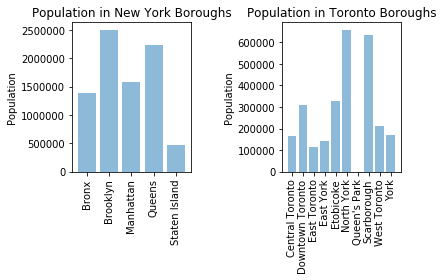

In [39]:
plt.subplot(1,2,1)

# New York Population plot by Borough
objects = NY_population['Borough']
y_pos = np.arange(len(objects))
performance = NY_population['Population']

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects, rotation='vertical')
plt.ylabel('Population')
plt.title('Population in New York Boroughs')

plt.tight_layout()

plt.subplot(1,2,2)

# Toronto Population plot by Borough
objects = TN_population2['Borough']
y_pos = np.arange(len(objects))
performance = TN_population2['Population']

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects, rotation='vertical')
plt.ylabel('Population')
plt.title('Population in Toronto Boroughs')

plt.tight_layout()

plt.show()

There seems to be no population data available for Queen's Park in Toronto, so I will ignore it in this analysis.

Based on the above bar graphs, Brooklyn and Queens are the most populated boroughs in New York. Similarly, North York and Scarborough are highly populated in Toronto.  

In this analysis, I will be concentrating on Brooklyn, New York and North York, Toronto boroughs for comparison of variety of restaurants.

#### Brooklyn Dataset

In [40]:
NY_neighborhoods = NY_neighborhoods[NY_neighborhoods['Borough'] == 'Brooklyn'].reset_index(drop=True)
NY_neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Brooklyn,Bay Ridge,40.625801,-74.030621
1,Brooklyn,Bensonhurst,40.611009,-73.995180
2,Brooklyn,Sunset Park,40.645103,-74.010316
3,Brooklyn,Greenpoint,40.730201,-73.954241
4,Brooklyn,Gravesend,40.595260,-73.973471


#### North York Dataset

In [41]:
df_Toronto_clean2 = df_Toronto_clean2[df_Toronto_clean2['Borough'] == 'North York'].reset_index(drop=True)
df_Toronto_clean2.head()

,Postcode,Borough,Neighborhood,Latitude,Longitude
0,M2H,North York,Hillcrest Village,43.803762,-79.363452
1,M2J,North York,"Fairview,Henry Farm,Oriole",43.778517,-79.346556
2,M2K,North York,Bayview Village,43.786947,-79.385975
3,M2L,North York,"Silver Hills,York Mills",43.757490,-79.374714
4,M2M,North York,"Newtonbrook,Willowdale",43.789053,-79.408493


#### PLOTTING MAPS  

Using Geopy library, I will be able to visually display the boroughs and neighborhoods in New York and Toronto. This is how the data will look like:

In [42]:
# New York map
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
NY_location = geolocator.geocode(address)
NY_latitude = NY_location.latitude
NY_longitude = NY_location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(NY_latitude, NY_longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


In [43]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[NY_latitude, NY_longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(NY_neighborhoods['Latitude'], NY_neighborhoods['Longitude'], NY_neighborhoods['Borough'], NY_neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

In [133]:
# Toronto map
address = 'Toronto,Ontario'
geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.653963, -79.387207.


In [46]:
# create map of New York using latitude and longitude values
map_Toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, Borough, Neighborhood in zip(df_Toronto_clean2['Latitude'], df_Toronto_clean2['Longitude'], df_Toronto_clean2['Borough'], df_Toronto_clean2['Neighborhood']):
    label = '{}, {}'.format(Neighborhood, Borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Toronto)  
    
map_Toronto

By looking at the 2 maps, it is certain that Brooklyn borough seems more busier with neighborhoods being so close to one another. Unlike in North York, the neighborhoods are spread evenly and well-spaced out.  

Let's see if Brooklyn has more or less restaurants than North York.  

### Foursquare API  

Now that I have my 2 datasets (Brooklyn, New York and North York, Toronto), I can make use of Foursquare API key to retrieve all nearby venues within the boroughs.  

Firstly, I will need to connect to Foursquare API with my Client ID and Client Secret ID. Once I have done that, I will create a function that will retrieve all nearby venues within 500 radius. I have placed a limit of 100 venues to be pulled from Foursquare API.

In [47]:
# Foursquare credentials
CLIENT_ID = 'VAN43G4DVSK1UFQMXKX2C50SDTTRENUUPKGTNFYXR0EQ5PPR' # your Foursquare ID
CLIENT_SECRET = 'WRAK0FOE22SFDI0INIBYBO5FBSUUHO4B5KIAQW4WQ43KSNWS' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: VAN43G4DVSK1UFQMXKX2C50SDTTRENUUPKGTNFYXR0EQ5PPR
CLIENT_SECRET:WRAK0FOE22SFDI0INIBYBO5FBSUUHO4B5KIAQW4WQ43KSNWS


In [48]:
LIMIT = 100 # limit of number of venues returned by Foursquare API

In [49]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]["groups"][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#### Brooklyn, New York  

Below is the list of all 100 venues in Brooklyn, New York:

In [50]:
NY_venues = getNearbyVenues(names=NY_neighborhoods['Neighborhood'],
                                   latitudes=NY_neighborhoods['Latitude'],
                                   longitudes=NY_neighborhoods['Longitude'])

Bay Ridge
Bensonhurst
Sunset Park
Greenpoint
Gravesend
Brighton Beach
Sheepshead Bay
Manhattan Terrace
Flatbush
Crown Heights
East Flatbush
Kensington
Windsor Terrace
Prospect Heights
Brownsville
Williamsburg
Bushwick
Bedford Stuyvesant
Brooklyn Heights
Cobble Hill
Carroll Gardens
Red Hook
Gowanus
Fort Greene
Park Slope
Cypress Hills
East New York
Starrett City
Canarsie
Flatlands
Mill Island
Manhattan Beach
Coney Island
Bath Beach
Borough Park
Dyker Heights
Gerritsen Beach
Marine Park
Clinton Hill
Sea Gate
Downtown
Boerum Hill
Prospect Lefferts Gardens
Ocean Hill
City Line
Bergen Beach
Midwood
Prospect Park South
Georgetown
East Williamsburg
North Side
South Side
Ocean Parkway
Fort Hamilton
Ditmas Park
Wingate
Rugby
Remsen Village
New Lots
Paerdegat Basin
Mill Basin
Fulton Ferry
Vinegar Hill
Weeksville
Broadway Junction
Dumbo
Homecrest
Highland Park
Madison
Erasmus


In [51]:
LIMIT=100
radius=500

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            NY_latitude, 
            NY_longitude, 
            radius, 
            LIMIT)
            
# make the GET request
results = requests.get(url).json()["response"]['groups'][0]['items']

In [52]:
print(NY_venues.shape)
NY_venues.head()

(2773, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Bay Ridge,40.625801,-74.030621,Pilo Arts Day Spa and Salon,40.624748,-74.030591,Spa
1,Bay Ridge,40.625801,-74.030621,Bagel Boy,40.627896,-74.029335,Bagel Shop
2,Bay Ridge,40.625801,-74.030621,Cocoa Grinder,40.623967,-74.030863,Juice Bar
3,Bay Ridge,40.625801,-74.030621,Pegasus Cafe,40.623168,-74.031186,Breakfast Spot
4,Bay Ridge,40.625801,-74.030621,Ho' Brah Taco Joint,40.622960,-74.031371,Taco Place


Let's see how many venues were pulled based on neighborhoods:

In [53]:
NY_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Bath Beach,48,48,48,48,48,48
Bay Ridge,83,83,83,83,83,83
Bedford Stuyvesant,26,26,26,26,26,26
Bensonhurst,30,30,30,30,30,30
Bergen Beach,7,7,7,7,7,7
Boerum Hill,88,88,88,88,88,88
Borough Park,20,20,20,20,20,20
Brighton Beach,45,45,45,45,45,45
Broadway Junction,12,12,12,12,12,12


In [54]:
print('There are {} uniques categories.'.format(len(NY_venues['Venue Category'].unique())))

There are 288 uniques categories.


Note that the above list of categories include all types of venues. Let's see what the data looks like when transposed.

I will use the **One Hot Encoding** methodlogy to transpose the venue categories.

In [55]:
# one hot encoding
NY_onehot = pd.get_dummies(NY_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
NY_onehot['Neighborhood'] = NY_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [NY_onehot.columns[-1]] + list(NY_onehot.columns[:-1])
NY_onehot = NY_onehot[fixed_columns]

NY_onehot.head()

,Yoga Studio,Accessories Store,Adult Boutique,African Restaurant,American Restaurant,Antique Shop,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Beach,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Breakfast Spot,Brewery,Bridge,Bubble Tea Shop,Buffet,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Cha Chaan Teng,Check Cashing Service,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distillery,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Service,Event Space,Factory,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Herbs & Spices Store,History Museum,Hobby Shop,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Insurance Office,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Korean Restaurant,Lake,Latin American Restaurant,Laundromat,Laundry Service,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Motorcycle Shop,Movie Theater,Moving Target,Museum,Music Store,Music Venue,Nail Salon,Neighborhood,New American Restaurant,Nightclub,Non-Profit,Noodle House,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Other Nightlife,Other Repair Shop,Outdoors & Recreation,Outlet Store,Pakistani Restaurant,Paper / Office Supplies Store,Park,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Photography Studio,Pie Shop,Piercing Parlor,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Polish Restaurant,Pool,Pool Hall,Print Shop,Pub,Racetrack,Ramen Restaurant,Record Shop,Rental Car Location,Residential Building (Apartment / Condo),Restaurant,River,Rock Club,Roof Deck,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Skating Rink,Ski Area,Smoke Shop,Snack Place,Soccer Field,South American Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Stationery Store,Steakhouse,Supermarket,Supplement Shop,Surf Spot,Sushi Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tattoo Parlor,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park Ride / Attraction,Thrift / Vintage Store,Tibetan Restaurant,Tiki Bar,Toy / Game Store,Trail,Turkish Restaurant,Used Boo

In [56]:
NY_onehot.shape

(2773, 288)

In [57]:
NY_grouped = NY_onehot.groupby('Neighborhood').mean().reset_index()
NY_grouped.head()

,Neighborhood,Yoga Studio,Accessories Store,Adult Boutique,African Restaurant,American Restaurant,Antique Shop,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Beach,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Breakfast Spot,Brewery,Bridge,Bubble Tea Shop,Buffet,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Cha Chaan Teng,Check Cashing Service,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distillery,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Service,Event Space,Factory,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Herbs & Spices Store,History Museum,Hobby Shop,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Insurance Office,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Korean Restaurant,Lake,Latin American Restaurant,Laundromat,Laundry Service,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Motorcycle Shop,Movie Theater,Moving Target,Museum,Music Store,Music Venue,Nail Salon,New American Restaurant,Nightclub,Non-Profit,Noodle House,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Other Nightlife,Other Repair Shop,Outdoors & Recreation,Outlet Store,Pakistani Restaurant,Paper / Office Supplies Store,Park,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Photography Studio,Pie Shop,Piercing Parlor,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Polish Restaurant,Pool,Pool Hall,Print Shop,Pub,Racetrack,Ramen Restaurant,Record Shop,Rental Car Location,Residential Building (Apartment / Condo),Restaurant,River,Rock Club,Roof Deck,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Skating Rink,Ski Area,Smoke Shop,Snack Place,Soccer Field,South American Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Stationery Store,Steakhouse,Supermarket,Supplement Shop,Surf Spot,Sushi Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tattoo Parlor,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park Ride / Attraction,Thrift / Vintage Store,Tibetan Restaurant,Tiki Bar,Toy / Game Store,Trail,Turkish Restaurant,Used Boo

In [58]:
NY_grouped_by = NY_grouped['Neighborhood'] # Store the neighbourhood column in a variable

Now that I have seen what other venue categories are listed, I can make the assumption that all restaurants will have the word 'Restaurant' mentioned in the Venue Category so I will only keep these fields in the dataset.

In [59]:
# Store all the column names that end with Restaurant as we are interested in.
NY_grouped_clean = NY_grouped.loc[:, NY_onehot.columns.str.endswith('Restaurant')]
NY_grouped_clean.head()

,Adult Boutique,African Restaurant,Antique Shop,Arepa Restaurant,Arts & Entertainment,Café,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Cheese Shop,Creperie,Dessert Shop,Dry Cleaner,Dumpling Restaurant,Electronics Store,Factory,Farmers Market,Field,Food Truck,General Entertainment,Gourmet Shop,Gymnastics Gym,Hardware Store,Hotel,Ice Cream Shop,Insurance Office,Israeli Restaurant,Italian Restaurant,Jewelry Store,Karaoke Bar,Kids Store,Lake,Laundry Service,Mattress Store,Metro Station,Mexican Restaurant,New American Restaurant,Pakistani Restaurant,Peruvian Restaurant,Polish Restaurant,Ramen Restaurant,Restaurant,Russian Restaurant,Seafood Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,South American Restaurant,Southern / Soul Food Restaurant,Spanish Restaurant,Sushi Restaurant,Taiwanese Restaurant,Tapas Restaurant,Thai Restaurant,Tibetan Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.020833,0.0,0.0,0.0,0.020833,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.020833,0.0,0.0,0.041667,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.020833,0.0,0.0,0.020833,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.020833,0.0,0.0,0.000000,0.0,0.020833,0.0,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.012048,0.024096,0.0,0.0,0.072289,0.0,0.0,0.012048,0.0,0.0,0.012048,0.0,0.012048,0.012048,0.0,0.000000,0.0,0.0,0.000000,0.0,0.012048,0.000000,0.0,0.0,0.0,0.0,0.024096,0.0,0.0,0.024096,0.0,0.000000,0.0,0.012048
2,0.0,0.0,0.0,0.0,0.0,0.076923,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.038462,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.038462,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.033333,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.066667,0.0,0.0,0.066667,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.033333,0.0,0.0,0.0,0.0,0.066667,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000


In [60]:
NY_grouped_clean.shape

(70, 57)

Even though I have filtered the dataset to only keep Restaurants, here is still some cleaning to be done in the above table. I noticed there are venues such as Dry Cleaner, Gymnastics Gym which are not related to Restaurants. Let's clean the dataset one more time to only keep the venues ending with the word 'Restaurant'.

In [61]:
# drop certain fields which are not ending with Restaurant
NY_grouped_clean = NY_grouped_clean.loc[:, NY_grouped_clean.columns.str.endswith('Restaurant')]
NY_grouped_clean.head()

,African Restaurant,Arepa Restaurant,Cantonese Restaurant,Caribbean Restaurant,Dumpling Restaurant,Israeli Restaurant,Italian Restaurant,Mexican Restaurant,New American Restaurant,Pakistani Restaurant,Peruvian Restaurant,Polish Restaurant,Ramen Restaurant,Restaurant,Russian Restaurant,Seafood Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,South American Restaurant,Southern / Soul Food Restaurant,Spanish Restaurant,Sushi Restaurant,Taiwanese Restaurant,Tapas Restaurant,Thai Restaurant,Tibetan Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,0.0,0.0,0.020833,0.0,0.0,0.0,0.041667,0.000000,0.000000,0.0,0.020833,0.0,0.0,0.020833,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.020833,0.0,0.0,0.000000,0.0,0.020833,0.0,0.000000
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.072289,0.012048,0.012048,0.0,0.000000,0.0,0.0,0.000000,0.0,0.012048,0.000000,0.0,0.0,0.0,0.0,0.024096,0.0,0.0,0.024096,0.0,0.000000,0.0,0.012048
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.038462,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.066667,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.033333,0.0,0.0,0.0,0.0,0.066667,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000


In [62]:
NY_grouped_clean.shape

(70, 29)

In [63]:
# Add the neighborhood column
NY_grouped_clean['Neighborhood'] = NY_grouped_by
NY_grouped_clean.head()

,African Restaurant,Arepa Restaurant,Cantonese Restaurant,Caribbean Restaurant,Dumpling Restaurant,Israeli Restaurant,Italian Restaurant,Mexican Restaurant,New American Restaurant,Pakistani Restaurant,Peruvian Restaurant,Polish Restaurant,Ramen Restaurant,Restaurant,Russian Restaurant,Seafood Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,South American Restaurant,Southern / Soul Food Restaurant,Spanish Restaurant,Sushi Restaurant,Taiwanese Restaurant,Tapas Restaurant,Thai Restaurant,Tibetan Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Neighborhood
0,0.0,0.0,0.020833,0.0,0.0,0.0,0.041667,0.000000,0.000000,0.0,0.020833,0.0,0.0,0.020833,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.020833,0.0,0.0,0.000000,0.0,0.020833,0.0,0.000000,Bath Beach
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.072289,0.012048,0.012048,0.0,0.000000,0.0,0.0,0.000000,0.0,0.012048,0.000000,0.0,0.0,0.0,0.0,0.024096,0.0,0.0,0.024096,0.0,0.000000,0.0,0.012048,Bay Ridge
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.038462,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,Bedford Stuyvesant
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.066667,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.033333,0.0,0.0,0.0,0.0,0.066667,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,Bensonhurst
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,Bergen Beach


Much better!

In [64]:
# Rearrange the neighborhood column to first
cols = list(NY_grouped_clean)
cols.insert(0, cols.pop(cols.index('Neighborhood')))
NY_grouped_clean = NY_grouped_clean.loc[:, cols]
NY_grouped_clean.head()

,Neighborhood,African Restaurant,Arepa Restaurant,Cantonese Restaurant,Caribbean Restaurant,Dumpling Restaurant,Israeli Restaurant,Italian Restaurant,Mexican Restaurant,New American Restaurant,Pakistani Restaurant,Peruvian Restaurant,Polish Restaurant,Ramen Restaurant,Restaurant,Russian Restaurant,Seafood Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,South American Restaurant,Southern / Soul Food Restaurant,Spanish Restaurant,Sushi Restaurant,Taiwanese Restaurant,Tapas Restaurant,Thai Restaurant,Tibetan Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,Bath Beach,0.0,0.0,0.020833,0.0,0.0,0.0,0.041667,0.000000,0.000000,0.0,0.020833,0.0,0.0,0.020833,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.020833,0.0,0.0,0.000000,0.0,0.020833,0.0,0.000000
1,Bay Ridge,0.0,0.0,0.000000,0.0,0.0,0.0,0.072289,0.012048,0.012048,0.0,0.000000,0.0,0.0,0.000000,0.0,0.012048,0.000000,0.0,0.0,0.0,0.0,0.024096,0.0,0.0,0.024096,0.0,0.000000,0.0,0.012048
2,Bedford Stuyvesant,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.038462,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000
3,Bensonhurst,0.0,0.0,0.000000,0.0,0.0,0.0,0.066667,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.033333,0.0,0.0,0.0,0.0,0.066667,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000
4,Bergen Beach,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000


Before I can apply K-Means clustering algorithm, I would like to focus on the most popular restaurants in the borough region. In order to rank the restaurants, I will sort the data in descending order of the mean number of restaurants. Once done, I will choose the 10 most common restaurants.

In [65]:
# First, let's write a function to sort the venues in descending order.
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [66]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
NY_neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
NY_neighborhoods_venues_sorted['Neighborhood'] = NY_grouped_clean['Neighborhood']

for ind in np.arange(NY_grouped_clean.shape[0]):
    NY_neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(NY_grouped_clean.iloc[ind, :], num_top_venues)

NY_neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bath Beach,Italian Restaurant,Turkish Restaurant,Cantonese Restaurant,Sushi Restaurant,Peruvian Restaurant,Restaurant,Vietnamese Restaurant,Ramen Restaurant,Arepa Restaurant,Caribbean Restaurant
1,Bay Ridge,Italian Restaurant,Thai Restaurant,Sushi Restaurant,Vietnamese Restaurant,Mexican Restaurant,New American Restaurant,Seafood Restaurant,Ramen Restaurant,Arepa Restaurant,Cantonese Restaurant
2,Bedford Stuyvesant,New American Restaurant,Vietnamese Restaurant,Restaurant,Arepa Restaurant,Cantonese Restaurant,Caribbean Restaurant,Dumpling Restaurant,Israeli Restaurant,Italian Restaurant,Mexican Restaurant
3,Bensonhurst,Sushi Restaurant,Italian Restaurant,Shabu-Shabu Restaurant,Vietnamese Restaurant,Ramen Restaurant,Arepa Restaurant,Cantonese Restaurant,Caribbean Restaurant,Dumpling Restaurant,Israeli Restaurant
4,Bergen Beach,Vietnamese Restaurant,Restaurant,Arepa Restaurant,Cantonese Restaurant,Caribbean Restaurant,Dumpling Restaurant,Israeli Restaurant,Italian Restaurant,Mexican Restaurant,New American Restaurant


Now, let's do the same for North York, Toronto data.  

#### North York, Toronto 

Below is the list of all 100 venues in North York, Toronto:

In [103]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [104]:
Toronto_venues = getNearbyVenues(names=df_Toronto_clean2['Neighborhood'],
                                   latitudes=df_Toronto_clean2['Latitude'],
                                   longitudes=df_Toronto_clean2['Longitude']
                                  )

Hillcrest Village
Fairview,Henry Farm,Oriole
Bayview Village
Silver Hills,York Mills
Newtonbrook,Willowdale
Willowdale South
York Mills West
Willowdale West
Parkwoods
Don Mills North
Flemingdon Park,Don Mills South
Bathurst Manor,Downsview North,Wilson Heights
Northwood Park,York University
CFB Toronto,Downsview East
Downsview West
Downsview Central
Downsview Northwest
Victoria Village
Bedford Park,Lawrence Manor East
Lawrence Heights,Lawrence Manor
Glencairn
Downsview,North Park,Upwood Park
Humber Summit
Emery,Humberlea


In [105]:
print(Toronto_venues.shape)
Toronto_venues.head()

(239, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Hillcrest Village,43.803762,-79.363452,Eagle's Nest Golf Club,43.805455,-79.364186,Golf Course
1,Hillcrest Village,43.803762,-79.363452,AY Jackson Pool,43.804515,-79.366138,Pool
2,Hillcrest Village,43.803762,-79.363452,Villa Madina,43.801685,-79.363938,Mediterranean Restaurant
3,Hillcrest Village,43.803762,-79.363452,Duncan Creek Park,43.805539,-79.360695,Dog Run
4,"Fairview,Henry Farm,Oriole",43.778517,-79.346556,The LEGO Store,43.778207,-79.343483,Toy / Game Store


Per Neighborhood, let's see how many venues were found in North York, Toronto.

In [106]:
Toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
"Bathurst Manor,Downsview North,Wilson Heights",20,20,20,20,20,20
Bayview Village,4,4,4,4,4,4
"Bedford Park,Lawrence Manor East",23,23,23,23,23,23
"CFB Toronto,Downsview East",3,3,3,3,3,3
Don Mills North,4,4,4,4,4,4
Downsview Central,4,4,4,4,4,4
Downsview Northwest,4,4,4,4,4,4
Downsview West,5,5,5,5,5,5
"Downsview,North Park,Upwood Park",4,4,4,4,4,4


In [107]:
print('There are {} uniques categories.'.format(len(Toronto_venues['Venue Category'].unique())))

There are 104 uniques categories.


Using **One Hot Encoding** to transpose the venues in the dataset.

In [108]:
# one hot encoding
Toronto_onehot = pd.get_dummies(Toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Toronto_onehot['Neighborhood'] = Toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [Toronto_onehot.columns[-1]] + list(Toronto_onehot.columns[:-1])
Toronto_onehot = Toronto_onehot[fixed_columns]

Toronto_onehot.head()

,Neighborhood,Accessories Store,Airport,American Restaurant,Arts & Crafts Store,Asian Restaurant,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beer Store,Bike Shop,Boutique,Bridal Shop,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Station,Business Service,Butcher,Cafeteria,Café,Candy Store,Caribbean Restaurant,Chinese Restaurant,Clothing Store,Coffee Shop,Comfort Food Restaurant,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Deli / Bodega,Department Store,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Electronics Store,Empanada Restaurant,Falafel Restaurant,Fast Food Restaurant,Food & Drink Shop,Food Court,Food Truck,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gas Station,Gift Shop,Golf Course,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hockey Arena,Home Service,Hotel,Ice Cream Shop,Indian Restaurant,Indonesian Restaurant,Intersection,Italian Restaurant,Japanese Restaurant,Juice Bar,Liquor Store,Lounge,Massage Studio,Mediterranean Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Movie Theater,Optical Shop,Park,Pet Store,Pharmacy,Pizza Place,Plaza,Pool,Portuguese Restaurant,Pub,Ramen Restaurant,Restaurant,Salon / Barbershop,Sandwich Place,Shoe Store,Shopping Mall,Smoothie Shop,Snack Place,Spa,Sporting Goods Shop,Steakhouse,Supermarket,Supplement Shop,Sushi Restaurant,Tea Room,Thai Restaurant,Theater,Toy / Game Store,Video Game Store,Video Store,Vietnamese Restaurant,Wings Joint,Women's Store
0,Hillcrest Village,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Hillcrest Village,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Hillcrest Village,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Hillcrest Village,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,"Fairview,Henry Farm,Oriole",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [109]:
Toronto_onehot.shape

(239, 105)

In [110]:
Toronto_grouped = Toronto_onehot.groupby('Neighborhood').mean().reset_index()
Toronto_grouped.head()

,Neighborhood,Accessories Store,Airport,American Restaurant,Arts & Crafts Store,Asian Restaurant,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beer Store,Bike Shop,Boutique,Bridal Shop,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Station,Business Service,Butcher,Cafeteria,Café,Candy Store,Caribbean Restaurant,Chinese Restaurant,Clothing Store,Coffee Shop,Comfort Food Restaurant,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Deli / Bodega,Department Store,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Electronics Store,Empanada Restaurant,Falafel Restaurant,Fast Food Restaurant,Food & Drink Shop,Food Court,Food Truck,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gas Station,Gift Shop,Golf Course,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hockey Arena,Home Service,Hotel,Ice Cream Shop,Indian Restaurant,Indonesian Restaurant,Intersection,Italian Restaurant,Japanese Restaurant,Juice Bar,Liquor Store,Lounge,Massage Studio,Mediterranean Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Movie Theater,Optical Shop,Park,Pet Store,Pharmacy,Pizza Place,Plaza,Pool,Portuguese Restaurant,Pub,Ramen Restaurant,Restaurant,Salon / Barbershop,Sandwich Place,Shoe Store,Shopping Mall,Smoothie Shop,Snack Place,Spa,Sporting Goods Shop,Steakhouse,Supermarket,Supplement Shop,Sushi Restaurant,Tea Room,Thai Restaurant,Theater,Toy / Game Store,Video Game Store,Video Store,Vietnamese Restaurant,Wings Joint,Women's Store
0,"Bathurst Manor,Downsview North,Wilson Heights",0.0,0.000000,0.000000,0.0,0.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.00,0.00,0.0,0.100000,0.000000,0.0,0.0,0.0,0.0,0.05,0.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,0.050000,0.0,0.0,0.0,0.05,0.05,0.0,0.05,0.05,0.0,0.000000,0.000000,0.0,0.00,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.00,0.000000,0.000000,0.0,0.0,0.0,0.05,0.0,0.0,0.0,0.000000,0.0,0.050000,0.050000,0.0,0.0,0.0,0.000000,0.0,0.050000,0.0,0.050000,0.0,0.05,0.0,0.000000,0.0,0.0,0.0,0.05,0.0,0.050000,0.0,0.000000,0.0,0.0,0.0,0.05,0.0,0.0,0.0
1,Bayview Village,0.0,0.000000,0.000000,0.0,0.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.250000,0.0,0.00,0.25,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.000000,0.000000,0.0,0.00,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.25,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.00,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.0
2,"Bedford Park,Lawrence Manor East",0.0,0.000000,0.043478,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.043478,0.0,0.043478,0.0,0.00,0.00,0.0,0.086957,0.043478,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.086957,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.043478,0.043478,0.0,0.00,0.0,0.0,0.0,0.0,0.043478,0.0,0.0,0.130435,0.00,0.043478,0.043478,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.000000,0.0,0.043478,0.043478,0.0,0.0,0.0,0.043478,0.0,0.043478,0.0,0.043478,0.0,0.00,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,0.043478,0.0,0.043478,0.0,0.0,0.0,0.00,0.0,0.0,0.0
3,"CFB Toronto,Downsview East",0.0,0.333333,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.00,0.00,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.000000,0.000000,0.0,0.00,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.00,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.333333,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.00,0.0,0.333333,0.0,0.0,0.0,0.00,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.0
4,Don Mills North,0.0,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.250000,0.0,0.25,0.00,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0

In [111]:
Toronto_grouped_by = Toronto_grouped['Neighborhood'] # Store the neighbourhood column in a variable

Now that I have seen what other venue categories are listed, I can make the assumption that all restaurants will have the word 'Restaurant' mentioned in the Venue Category so I will only keep these fields in the dataset.

In [112]:
# Store all the column names that end with Restaurant as we are interested in.
Toronto_grouped_clean = Toronto_grouped.loc[:, Toronto_onehot.columns.str.endswith('Restaurant')]
Toronto_grouped_clean.head()

,American Restaurant,Asian Restaurant,Caribbean Restaurant,Chinese Restaurant,Comfort Food Restaurant,Dim Sum Restaurant,Empanada Restaurant,Falafel Restaurant,Fast Food Restaurant,Greek Restaurant,Indian Restaurant,Indonesian Restaurant,Italian Restaurant,Japanese Restaurant,Mediterranean Restaurant,Middle Eastern Restaurant,Portuguese Restaurant,Ramen Restaurant,Restaurant,Sushi Restaurant,Thai Restaurant,Vietnamese Restaurant
0,0.000000,0.0,0.00,0.00,0.000000,0.0,0.0,0.0,0.050000,0.000000,0.000000,0.0,0.000000,0.00,0.0,0.05,0.0,0.0,0.050000,0.050000,0.000000,0.0
1,0.000000,0.0,0.00,0.25,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.25,0.0,0.00,0.0,0.0,0.000000,0.000000,0.000000,0.0
2,0.043478,0.0,0.00,0.00,0.043478,0.0,0.0,0.0,0.086957,0.043478,0.043478,0.0,0.130435,0.00,0.0,0.00,0.0,0.0,0.043478,0.043478,0.043478,0.0
3,0.000000,0.0,0.00,0.00,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.00,0.0,0.00,0.0,0.0,0.000000,0.000000,0.000000,0.0
4,0.000000,0.0,0.25,0.00,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.25,0.0,0.00,0.0,0.0,0.000000,0.000000,0.000000,0.0


In [113]:
# Add the neighborhood column
Toronto_grouped_clean['Neighborhood'] = Toronto_grouped_by
Toronto_grouped_clean.head()

/Users/KT/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,American Restaurant,Asian Restaurant,Caribbean Restaurant,Chinese Restaurant,Comfort Food Restaurant,Dim Sum Restaurant,Empanada Restaurant,Falafel Restaurant,Fast Food Restaurant,Greek Restaurant,Indian Restaurant,Indonesian Restaurant,Italian Restaurant,Japanese Restaurant,Mediterranean Restaurant,Middle Eastern Restaurant,Portuguese Restaurant,Ramen Restaurant,Restaurant,Sushi Restaurant,Thai Restaurant,Vietnamese Restaurant,Neighborhood
0,0.000000,0.0,0.00,0.00,0.000000,0.0,0.0,0.0,0.050000,0.000000,0.000000,0.0,0.000000,0.00,0.0,0.05,0.0,0.0,0.050000,0.050000,0.000000,0.0,"Bathurst Manor,Downsview North,Wilson Heights"
1,0.000000,0.0,0.00,0.25,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.25,0.0,0.00,0.0,0.0,0.000000,0.000000,0.000000,0.0,Bayview Village
2,0.043478,0.0,0.00,0.00,0.043478,0.0,0.0,0.0,0.086957,0.043478,0.043478,0.0,0.130435,0.00,0.0,0.00,0.0,0.0,0.043478,0.043478,0.043478,0.0,"Bedford Park,Lawrence Manor East"
3,0.000000,0.0,0.00,0.00,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.00,0.0,0.00,0.0,0.0,0.000000,0.000000,0.000000,0.0,"CFB Toronto,Downsview East"
4,0.000000,0.0,0.25,0.00,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.25,0.0,0.00,0.0,0.0,0.000000,0.000000,0.000000,0.0,Don Mills North


In [114]:
# Rearrange the neighborhood column to first
cols = list(Toronto_grouped_clean)
cols.insert(0, cols.pop(cols.index('Neighborhood')))
Toronto_grouped_clean = Toronto_grouped_clean.loc[:, cols]
Toronto_grouped_clean.head()

,Neighborhood,American Restaurant,Asian Restaurant,Caribbean Restaurant,Chinese Restaurant,Comfort Food Restaurant,Dim Sum Restaurant,Empanada Restaurant,Falafel Restaurant,Fast Food Restaurant,Greek Restaurant,Indian Restaurant,Indonesian Restaurant,Italian Restaurant,Japanese Restaurant,Mediterranean Restaurant,Middle Eastern Restaurant,Portuguese Restaurant,Ramen Restaurant,Restaurant,Sushi Restaurant,Thai Restaurant,Vietnamese Restaurant
0,"Bathurst Manor,Downsview North,Wilson Heights",0.000000,0.0,0.00,0.00,0.000000,0.0,0.0,0.0,0.050000,0.000000,0.000000,0.0,0.000000,0.00,0.0,0.05,0.0,0.0,0.050000,0.050000,0.000000,0.0
1,Bayview Village,0.000000,0.0,0.00,0.25,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.25,0.0,0.00,0.0,0.0,0.000000,0.000000,0.000000,0.0
2,"Bedford Park,Lawrence Manor East",0.043478,0.0,0.00,0.00,0.043478,0.0,0.0,0.0,0.086957,0.043478,0.043478,0.0,0.130435,0.00,0.0,0.00,0.0,0.0,0.043478,0.043478,0.043478,0.0
3,"CFB Toronto,Downsview East",0.000000,0.0,0.00,0.00,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.00,0.0,0.00,0.0,0.0,0.000000,0.000000,0.000000,0.0
4,Don Mills North,0.000000,0.0,0.25,0.00,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.25,0.0,0.00,0.0,0.0,0.000000,0.000000,0.000000,0.0


Before I can apply K-Means clustering algorithm, I would like to focus on the most popular restaurants in the borough region. In order to rank the restaurants, I will sort the data in descending order of the mean number of restaurants. Once done, I will choose the 10 most common restaurants.

In [115]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [116]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
TN_neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
TN_neighborhoods_venues_sorted['Neighborhood'] = Toronto_grouped_clean['Neighborhood']

for ind in np.arange(Toronto_grouped_clean.shape[0]):
    TN_neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Toronto_grouped_clean.iloc[ind, :], num_top_venues)

TN_neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Bathurst Manor,Downsview North,Wilson Heights",Fast Food Restaurant,Sushi Restaurant,Restaurant,Middle Eastern Restaurant,Vietnamese Restaurant,Asian Restaurant,Caribbean Restaurant,Chinese Restaurant,Comfort Food Restaurant,Dim Sum Restaurant
1,Bayview Village,Chinese Restaurant,Japanese Restaurant,Vietnamese Restaurant,Greek Restaurant,Asian Restaurant,Caribbean Restaurant,Comfort Food Restaurant,Dim Sum Restaurant,Empanada Restaurant,Falafel Restaurant
2,"Bedford Park,Lawrence Manor East",Italian Restaurant,Fast Food Restaurant,Indian Restaurant,Comfort Food Restaurant,Greek Restaurant,Thai Restaurant,American Restaurant,Restaurant,Sushi Restaurant,Mediterranean Restaurant
3,"CFB Toronto,Downsview East",Vietnamese Restaurant,Thai Restaurant,Asian Restaurant,Caribbean Restaurant,Chinese Restaurant,Comfort Food Restaurant,Dim Sum Restaurant,Empanada Restaurant,Falafel Restaurant,Fast Food Restaurant
4,Don Mills North,Caribbean Restaurant,Japanese Restaurant,Vietnamese Restaurant,Greek Restaurant,Asian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Dim Sum Restaurant,Empanada Restaurant,Falafel Restaurant


Per neighborhood, there are restaurants grouped into 1st most common restaurant venue to 10th most common restaurant venue. We can now see where in the world map they are clustered together.

### K-Means clustering

By using one of the Machine Learning methods, we can group the restaurants by Neighbourhoods and visually see where most of them are geographically located.

#### K-Means Clustering of Brooklyn, New York Neighborhoods

In [82]:
# set number of clusters
kclusters = 5

NY_grouped_clustering = NY_grouped_clean.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(NY_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 2, 0, 2, 2, 2, 4, 1, 0], dtype=int32)

In [83]:
# add clustering labels
NY_neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

NY_merged = NY_neighborhoods

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
NY_merged = NY_merged.join(NY_neighborhoods_venues_sorted.set_index('Neighborhood'), 
                           on='Neighborhood', 
                          how='right')

NY_merged.head() # check the last columns!

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Brooklyn,Bay Ridge,40.625801,-74.030621,0,Italian Restaurant,Thai Restaurant,Sushi Restaurant,Vietnamese Restaurant,Mexican Restaurant,New American Restaurant,Seafood Restaurant,Ramen Restaurant,Arepa Restaurant,Cantonese Restaurant
1,Brooklyn,Bensonhurst,40.611009,-73.995180,0,Sushi Restaurant,Italian Restaurant,Shabu-Shabu Restaurant,Vietnamese Restaurant,Ramen Restaurant,Arepa Restaurant,Cantonese Restaurant,Caribbean Restaurant,Dumpling Restaurant,Israeli Restaurant
2,Brooklyn,Sunset Park,40.645103,-74.010316,2,Mexican Restaurant,Italian Restaurant,Vietnamese Restaurant,Restaurant,Arepa Restaurant,Cantonese Restaurant,Caribbean Restaurant,Dumpling Restaurant,Israeli Restaurant,New American Restaurant
3,Brooklyn,Greenpoint,40.730201,-73.954241,2,Sushi Restaurant,Polish Restaurant,Italian Restaurant,Mexican Restaurant,New American Restaurant,Restaurant,Vietnamese Restaurant,Thai Restaurant,Vegetarian / Vegan Restaurant,Arepa Restaurant
4,Brooklyn,Gravesend,40.595260,-73.973471,0,Italian Restaurant,Vietnamese Restaurant,Restaurant,Arepa Restaurant,Cantonese Restaurant,Caribbean Restaurant,Dumpling Restaurant,Israeli Restaurant,Mexican Restaurant,New American Restaurant


In [84]:
# create map
map_clusters = folium.Map(location=[NY_latitude, NY_longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(NY_merged['Latitude'], NY_merged['Longitude'], NY_merged['Neighborhood'], NY_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

#### Examine the 5 clusters:

In [85]:
# Cluster 1
NY_merged.loc[NY_merged['Cluster Labels'] == 0, NY_merged.columns[[1] + list(range(5, NY_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bay Ridge,Italian Restaurant,Thai Restaurant,Sushi Restaurant,Vietnamese Restaurant,Mexican Restaurant,New American Restaurant,Seafood Restaurant,Ramen Restaurant,Arepa Restaurant,Cantonese Restaurant
1,Bensonhurst,Sushi Restaurant,Italian Restaurant,Shabu-Shabu Restaurant,Vietnamese Restaurant,Ramen Restaurant,Arepa Restaurant,Cantonese Restaurant,Caribbean Restaurant,Dumpling Restaurant,Israeli Restaurant
4,Gravesend,Italian Restaurant,Vietnamese Restaurant,Restaurant,Arepa Restaurant,Cantonese Restaurant,Caribbean Restaurant,Dumpling Restaurant,Israeli Restaurant,Mexican Restaurant,New American Restaurant
6,Sheepshead Bay,Turkish Restaurant,Russian Restaurant,Restaurant,Italian Restaurant,Arepa Restaurant,Cantonese Restaurant,Caribbean Restaurant,Dumpling Restaurant,Israeli Restaurant,Mexican Restaurant
12,Windsor Terrace,Sushi Restaurant,Italian Restaurant,Vietnamese Restaurant,Restaurant,Arepa Restaurant,Cantonese Restaurant,Caribbean Restaurant,Dumpling Restaurant,Israeli Restaurant,Mexican Restaurant
18,Brooklyn Heights,Italian Restaurant,Thai Restaurant,Mexican Restaurant,Vietnamese Restaurant,Ramen Restaurant,Sushi Restaurant,New American Restaurant,Arepa Restaurant,Cantonese Restaurant,Caribbean Restaurant
20,Carroll Gardens,Italian Restaurant,Thai Restaurant,Dumpling Restaurant,Sushi Restaurant,Seafood Restaurant,Restaurant,Vietnamese Restaurant,Polish Restaurant,Arepa Restaurant,Cantonese Restaurant
22,Gowanus,Italian Restaurant,Mexican Restaurant,Ramen Restaurant,Thai Restaurant,Sushi Restaurant,Vietnamese Restaurant,Arepa Restaurant,Cantonese Restaurant,Caribbean Restaurant,Dumpling Restaurant
23,Fort Greene,Italian Restaurant,New American Restaurant,Vietnamese Restaurant,Southern / Soul Food Restaurant,Restaurant,Vegetarian / Vegan Restaurant,Seafood Restaurant,Mexican Restaurant,Israeli Restaurant,Caribbean Restaurant
24,Park Slope,Italian Restaurant,Vietnamese Restaurant,Ramen Restaurant,Thai Restaurant,Caribbean Restaurant,Sushi Restaurant,Mexican Restaurant,Seafood Restaurant,Arepa Restaurant,Cantonese Restaurant


In [86]:
# Cluster 2
NY_merged.loc[NY_merged['Cluster Labels'] == 1, NY_merged.columns[[1] + list(range(5, NY_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,Flatbush,Caribbean Restaurant,Mexican Restaurant,Vietnamese Restaurant,Restaurant,Arepa Restaurant,Cantonese Restaurant,Dumpling Restaurant,Israeli Restaurant,Italian Restaurant,New American Restaurant
10,East Flatbush,Caribbean Restaurant,Vietnamese Restaurant,Restaurant,Arepa Restaurant,Cantonese Restaurant,Dumpling Restaurant,Israeli Restaurant,Italian Restaurant,Mexican Restaurant,New American Restaurant
26,East New York,Caribbean Restaurant,Vietnamese Restaurant,Restaurant,Arepa Restaurant,Cantonese Restaurant,Dumpling Restaurant,Israeli Restaurant,Italian Restaurant,Mexican Restaurant,New American Restaurant
27,Starrett City,Caribbean Restaurant,Vietnamese Restaurant,Restaurant,Arepa Restaurant,Cantonese Restaurant,Dumpling Restaurant,Israeli Restaurant,Italian Restaurant,Mexican Restaurant,New American Restaurant
29,Flatlands,Caribbean Restaurant,Seafood Restaurant,Vietnamese Restaurant,Restaurant,Arepa Restaurant,Cantonese Restaurant,Dumpling Restaurant,Israeli Restaurant,Italian Restaurant,Mexican Restaurant
32,Coney Island,Caribbean Restaurant,Vietnamese Restaurant,Restaurant,Arepa Restaurant,Cantonese Restaurant,Dumpling Restaurant,Israeli Restaurant,Italian Restaurant,Mexican Restaurant,New American Restaurant
47,Prospect Park South,Caribbean Restaurant,Mexican Restaurant,Southern / Soul Food Restaurant,Seafood Restaurant,Vietnamese Restaurant,Ramen Restaurant,Arepa Restaurant,Cantonese Restaurant,Dumpling Restaurant,Israeli Restaurant
54,Ditmas Park,Caribbean Restaurant,Ramen Restaurant,Tibetan Restaurant,Tapas Restaurant,Mexican Restaurant,Seafood Restaurant,Vietnamese Restaurant,Arepa Restaurant,Cantonese Restaurant,Dumpling Restaurant
56,Rugby,Caribbean Restaurant,Seafood Restaurant,Vietnamese Restaurant,Restaurant,Arepa Restaurant,Cantonese Restaurant,Dumpling Restaurant,Israeli Restaurant,Italian Restaurant,Mexican Restaurant
57,Remsen Village,Caribbean Restaurant,Southern / Soul Food Restaurant,Vietnamese Restaurant,Restaurant,Arepa Restaurant,Cantonese Restaurant,Dumpling Restaurant,Israeli Restaurant,Italian Restaurant,Mexican Restaurant


In [87]:
# Cluster 3
NY_merged.loc[NY_merged['Cluster Labels'] == 2, NY_merged.columns[[1] + list(range(5, NY_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Sunset Park,Mexican Restaurant,Italian Restaurant,Vietnamese Restaurant,Restaurant,Arepa Restaurant,Cantonese Restaurant,Caribbean Restaurant,Dumpling Restaurant,Israeli Restaurant,New American Restaurant
3,Greenpoint,Sushi Restaurant,Polish Restaurant,Italian Restaurant,Mexican Restaurant,New American Restaurant,Restaurant,Vietnamese Restaurant,Thai Restaurant,Vegetarian / Vegan Restaurant,Arepa Restaurant
7,Manhattan Terrace,Restaurant,Vietnamese Restaurant,Arepa Restaurant,Cantonese Restaurant,Caribbean Restaurant,Dumpling Restaurant,Israeli Restaurant,Italian Restaurant,Mexican Restaurant,New American Restaurant
9,Crown Heights,Vietnamese Restaurant,Restaurant,Arepa Restaurant,Cantonese Restaurant,Caribbean Restaurant,Dumpling Restaurant,Israeli Restaurant,Italian Restaurant,Mexican Restaurant,New American Restaurant
11,Kensington,Thai Restaurant,Restaurant,Mexican Restaurant,Vietnamese Restaurant,Arepa Restaurant,Cantonese Restaurant,Caribbean Restaurant,Dumpling Restaurant,Israeli Restaurant,Italian Restaurant
13,Prospect Heights,Thai Restaurant,Mexican Restaurant,Restaurant,New American Restaurant,Vietnamese Restaurant,Southern / Soul Food Restaurant,Vegetarian / Vegan Restaurant,Italian Restaurant,Ramen Restaurant,Sushi Restaurant
15,Williamsburg,Tapas Restaurant,Vietnamese Restaurant,Restaurant,Arepa Restaurant,Cantonese Restaurant,Caribbean Restaurant,Dumpling Restaurant,Israeli Restaurant,Italian Restaurant,Mexican Restaurant
16,Bushwick,Mexican Restaurant,Italian Restaurant,Vegetarian / Vegan Restaurant,Restaurant,Caribbean Restaurant,New American Restaurant,Pakistani Restaurant,Vietnamese Restaurant,Arepa Restaurant,Cantonese Restaurant
17,Bedford Stuyvesant,New American Restaurant,Vietnamese Restaurant,Restaurant,Arepa Restaurant,Cantonese Restaurant,Caribbean Restaurant,Dumpling Restaurant,Israeli Restaurant,Italian Restaurant,Mexican Restaurant
19,Cobble Hill,Italian Restaurant,Thai Restaurant,Mexican Restaurant,Spanish Restaurant,Restaurant,Seafood Restaurant,Dumpling Restaurant,Sushi Restaurant,New American Restaurant,Pakistani Restaurant


In [88]:
# Cluster 4
NY_merged.loc[NY_merged['Cluster Labels'] == 3, NY_merged.columns[[1] + list(range(5, NY_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
28,Canarsie,Thai Restaurant,Caribbean Restaurant,Vietnamese Restaurant,Restaurant,Arepa Restaurant,Cantonese Restaurant,Dumpling Restaurant,Israeli Restaurant,Italian Restaurant,Mexican Restaurant


In [89]:
# Cluster 5
NY_merged.loc[NY_merged['Cluster Labels'] == 4, NY_merged.columns[[1] + list(range(5, NY_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,Brighton Beach,Russian Restaurant,Restaurant,Sushi Restaurant,Arepa Restaurant,Cantonese Restaurant,Caribbean Restaurant,Dumpling Restaurant,Israeli Restaurant,Italian Restaurant,Mexican Restaurant
14,Brownsville,Restaurant,Caribbean Restaurant,Spanish Restaurant,Vietnamese Restaurant,Arepa Restaurant,Cantonese Restaurant,Dumpling Restaurant,Israeli Restaurant,Italian Restaurant,Mexican Restaurant
52,Ocean Parkway,Restaurant,Sushi Restaurant,Vietnamese Restaurant,Arepa Restaurant,Cantonese Restaurant,Caribbean Restaurant,Dumpling Restaurant,Israeli Restaurant,Italian Restaurant,Mexican Restaurant


### **Can I group the clusters into certain types of restaurants?**  

The clusters still show quite a lot of variety in the types of restaurants. Perhaps we can plot the most common venues to see which ones are more popular. There are quite a few under the field 'Restaurant' which doesn't specify what cuisine it falls under. We can make an assumption that it is an anomaly in this analysis.


#### K-Means Clustering of North York, Toronto Neighborhoods

In [117]:
# set number of clusters
kclusters = 5

Toronto_grouped_clustering = Toronto_grouped_clean.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 2, 0, 0, 2, 0, 0, 0, 0, 0], dtype=int32)

In [118]:
# add clustering labels
TN_neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

Toronto_merged = df_Toronto_clean2

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
Toronto_merged = Toronto_merged.join(TN_neighborhoods_venues_sorted.set_index('Neighborhood'), 
                                     on='Neighborhood', 
                                     how = 'right')

Toronto_merged.head() # check the last columns!

,Postcode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M2H,North York,Hillcrest Village,43.803762,-79.363452,4,Mediterranean Restaurant,Vietnamese Restaurant,Greek Restaurant,Asian Restaurant,Caribbean Restaurant,Chinese Restaurant,Comfort Food Restaurant,Dim Sum Restaurant,Empanada Restaurant,Falafel Restaurant
1,M2J,North York,"Fairview,Henry Farm,Oriole",43.778517,-79.346556,0,Fast Food Restaurant,Japanese Restaurant,American Restaurant,Asian Restaurant,Restaurant,Chinese Restaurant,Greek Restaurant,Caribbean Restaurant,Comfort Food Restaurant,Dim Sum Restaurant
2,M2K,North York,Bayview Village,43.786947,-79.385975,2,Chinese Restaurant,Japanese Restaurant,Vietnamese Restaurant,Greek Restaurant,Asian Restaurant,Caribbean Restaurant,Comfort Food Restaurant,Dim Sum Restaurant,Empanada Restaurant,Falafel Restaurant
3,M2L,North York,"Silver Hills,York Mills",43.757490,-79.374714,0,Vietnamese Restaurant,Thai Restaurant,Asian Restaurant,Caribbean Restaurant,Chinese Restaurant,Comfort Food Restaurant,Dim Sum Restaurant,Empanada Restaurant,Falafel Restaurant,Fast Food Restaurant
5,M2N,North York,Willowdale South,43.770120,-79.408493,0,Sushi Restaurant,Ramen Restaurant,Restaurant,Vietnamese Restaurant,Middle Eastern Restaurant,Japanese Restaurant,Indonesian Restaurant,Fast Food Restaurant,Empanada Restaurant,Asian Restaurant


In [119]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Toronto_merged['Latitude'], Toronto_merged['Longitude'], Toronto_merged['Neighborhood'], Toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [120]:
# Cluster 1
Toronto_merged.loc[Toronto_merged['Cluster Labels'] == 0, Toronto_merged.columns[[1] + list(range(5, Toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,North York,0,Fast Food Restaurant,Japanese Restaurant,American Restaurant,Asian Restaurant,Restaurant,Chinese Restaurant,Greek Restaurant,Caribbean Restaurant,Comfort Food Restaurant,Dim Sum Restaurant
3,North York,0,Vietnamese Restaurant,Thai Restaurant,Asian Restaurant,Caribbean Restaurant,Chinese Restaurant,Comfort Food Restaurant,Dim Sum Restaurant,Empanada Restaurant,Falafel Restaurant,Fast Food Restaurant
5,North York,0,Sushi Restaurant,Ramen Restaurant,Restaurant,Vietnamese Restaurant,Middle Eastern Restaurant,Japanese Restaurant,Indonesian Restaurant,Fast Food Restaurant,Empanada Restaurant,Asian Restaurant
6,North York,0,Vietnamese Restaurant,Thai Restaurant,Asian Restaurant,Caribbean Restaurant,Chinese Restaurant,Comfort Food Restaurant,Dim Sum Restaurant,Empanada Restaurant,Falafel Restaurant,Fast Food Restaurant
7,North York,0,Vietnamese Restaurant,Thai Restaurant,Asian Restaurant,Caribbean Restaurant,Chinese Restaurant,Comfort Food Restaurant,Dim Sum Restaurant,Empanada Restaurant,Falafel Restaurant,Fast Food Restaurant
8,North York,0,Vietnamese Restaurant,Thai Restaurant,Asian Restaurant,Caribbean Restaurant,Chinese Restaurant,Comfort Food Restaurant,Dim Sum Restaurant,Empanada Restaurant,Falafel Restaurant,Fast Food Restaurant
10,North York,0,Asian Restaurant,Fast Food Restaurant,Restaurant,Chinese Restaurant,Dim Sum Restaurant,Japanese Restaurant,Italian Restaurant,Vietnamese Restaurant,Caribbean Restaurant,Comfort Food Restaurant
11,North York,0,Fast Food Restaurant,Sushi Restaurant,Restaurant,Middle Eastern Restaurant,Vietnamese Restaurant,Asian Restaurant,Caribbean Restaurant,Chinese Restaurant,Comfort Food Restaurant,Dim Sum Restaurant
13,North York,0,Vietnamese Restaurant,Thai Restaurant,Asian Restaurant,Caribbean Restaurant,Chinese Restaurant,Comfort Food Restaurant,Dim Sum Restaurant,Empanada Restaurant,Falafel Restaurant,Fast Food Restaurant
14,North York,0,Vietnamese Restaurant,Thai Restaurant,Asian Restaurant,Caribbean Restaurant,Chinese Restaurant,Comfort Food Restaurant,Dim Sum Restaurant,Empanada Restaurant,Falafel Restaurant,Fast Food Restaurant


In [121]:
# Cluster 2
Toronto_merged.loc[Toronto_merged['Cluster Labels'] == 1, Toronto_merged.columns[[1] + list(range(5, Toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
22,North York,1,Caribbean Restaurant,Empanada Restaurant,Vietnamese Restaurant,Thai Restaurant,Asian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Dim Sum Restaurant,Falafel Restaurant,Fast Food Restaurant


In [122]:
# Cluster 3
Toronto_merged.loc[Toronto_merged['Cluster Labels'] == 2, Toronto_merged.columns[[1] + list(range(5, Toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,North York,2,Chinese Restaurant,Japanese Restaurant,Vietnamese Restaurant,Greek Restaurant,Asian Restaurant,Caribbean Restaurant,Comfort Food Restaurant,Dim Sum Restaurant,Empanada Restaurant,Falafel Restaurant
9,North York,2,Caribbean Restaurant,Japanese Restaurant,Vietnamese Restaurant,Greek Restaurant,Asian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Dim Sum Restaurant,Empanada Restaurant,Falafel Restaurant
20,North York,2,Japanese Restaurant,Vietnamese Restaurant,Greek Restaurant,Asian Restaurant,Caribbean Restaurant,Chinese Restaurant,Comfort Food Restaurant,Dim Sum Restaurant,Empanada Restaurant,Falafel Restaurant


In [123]:
# Cluster 4
Toronto_merged.loc[Toronto_merged['Cluster Labels'] == 3, Toronto_merged.columns[[1] + list(range(5, Toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
12,North York,3,Caribbean Restaurant,Falafel Restaurant,Vietnamese Restaurant,Thai Restaurant,Asian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Dim Sum Restaurant,Empanada Restaurant,Fast Food Restaurant


In [124]:
# Cluster 5
Toronto_merged.loc[Toronto_merged['Cluster Labels'] == 4, Toronto_merged.columns[[1] + list(range(5, Toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,North York,4,Mediterranean Restaurant,Vietnamese Restaurant,Greek Restaurant,Asian Restaurant,Caribbean Restaurant,Chinese Restaurant,Comfort Food Restaurant,Dim Sum Restaurant,Empanada Restaurant,Falafel Restaurant


### **Can I group the clusters into certain types of restaurants?**  

After examining the clusters, it is certain that cluster 3 (which makes up 70% of the dataset), has quite alot of Asian restaurants (Vietnamese, Thai and Indian majorly). The other clusters are too small to make an assumption. However, it is for sure seems like there is more variety of cuisines in Brooklyn, New York than in North York, Toronto!

## Results & Discussion  <a name="results"></a>

Plotting the 1st and 2nd most common restaurants in both datasets gives a slightly better idea of what types of cuisines are available.  

#### Brooklyn, New York and common restaurants

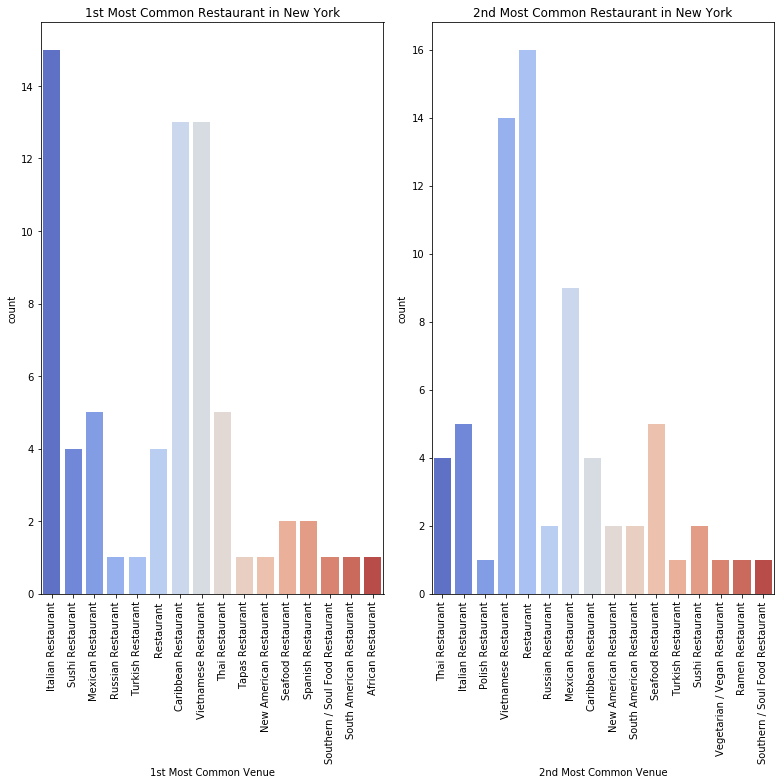

In [131]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (11,11))
ax1 = sns.countplot(x = '1st Most Common Venue', data = NY_merged,
                   palette = 'coolwarm', ax = ax1)
ax1.set_title('1st Most Common Restaurant in New York')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation = 90)

ax2 = sns.countplot(x = '2nd Most Common Venue', data = NY_merged,
                   palette = 'coolwarm', ax = ax2)
ax2.set_title('2nd Most Common Restaurant in New York')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation = 90)

plt.show()

#### North York, Toronto and common restaurants

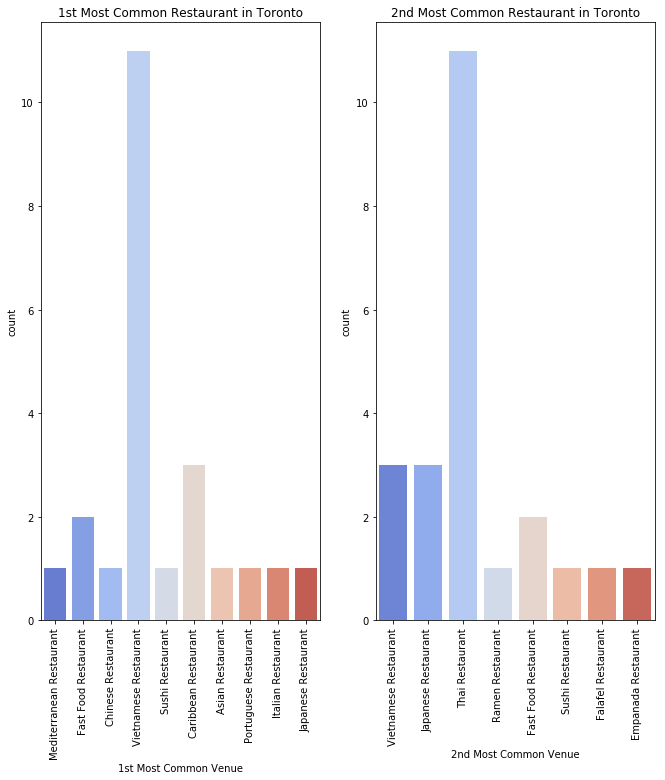

In [129]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (11,11))
ax1 = sns.countplot(x = '1st Most Common Venue', data = Toronto_merged,
                   palette = 'coolwarm', ax = ax1)
ax1.set_title('1st Most Common Restaurant in Toronto')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation = 90)

ax2 = sns.countplot(x = '2nd Most Common Venue', data = Toronto_merged,
                   palette = 'coolwarm', ax = ax2)
ax2.set_title('2nd Most Common Restaurant in Toronto')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation = 90)

plt.show()

In Brooklyn, the most common restaurants are Italian, Vietnamese and Carribean. The least common restaurant cuisines are Turkish, Vegetarian/Vegan and South American! Surprising how American cuisine restaurants are less common in the most populated borough of New York, USA!  

While in North York, the most common cuisine is Vietnamese and Thai. The least common cuisines in North York include Chinese and European (French, Mediteranean, Italian, Portuguese).  

This could also mean that majority of the people living in these 2 boroughs could be Italian, Caribbean or Asian origin in Brooklyn and mostly Asian origin in North York. One way to validate this is to find out the population by ethnic origin/race in both boroughs. Unfortunately, there was no data found online which splits the origin by borough and neighborhood to investigate this. It can definitely be part of further investigation.

## Conclusion  <a name="conclusion"></a>

The main goal of this analysis was to find whether there are a variety of restaurnats available in the 2 big cities. In addition, if there are lots of restaurants, what cuisine is most popular within that region.  

Having retrieved data restaurant cuisines from Foursquare API, we have found that both boroughs are more populated with cuisines of other countries; Italian, Caribbean and Asian origin in Brooklyn and Asian origin in North York.  

As mentioned previously, further investigation can be done to find out if the restaurants in specific boroughs are linked to the ethnicity/race. It could also be that boroughs investigated are more populated as it is a residential area and not necessarily the most visited area.

If anyone is looking to open a restaurant in Brooklyn or North York, it is good to know that opening a restaurant of these highly common cuisines will result in market competition. Perhaps opening a restaurant of a different cuisine will be beneficial as it will give the travellers a variety of choices. There will definitely be other factors that require investigation too such as specific characteristics of neighborhoods and locations in every recommended zone, taking into consideration additional factors like attractiveness of each location (proximity to park or water), levels of noise/proximity to major roads, real estate availability, prices, social and economic dynamics of every neighborhood etc. 

## References  <a name="references"></a>

- *NYU Spatial Data Repository:* https://geo.nyu.edu/catalog/nyu_2451_34572
- *Wikipedia:* https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M
- *Beautiful Soup (version 4 latest):* https://beautiful-soup-4.readthedocs.io/en/latest/ 
- *New York Population:* https://catalog.data.gov/dataset/new-york-city-population-by-neighborhood-tabulation-areas-f2447
- *Toronto Population:* https://www12.statcan.gc.ca/census-recensement/2016/dp-pd/hlt-fst/pd-pl/Table.cfm?Lang=Eng&T=1201&SR=1&S=22&O=A&RPP=9999&PR=0
- *K-Means clustering:* https://blogs.oracle.com/datascience/introduction-to-k-means-clustering
- *K-Means clustering:* https://en.wikipedia.org/wiki/K-means_clustering